# Importing data and libraries

In [151]:
import cv2
import imghdr
import os

In [152]:
data_dir = 'data'
img_exts = [
    'jpg','jpeg','bmp','png'
]

In [153]:
working = os.listdir(data_dir)
if '.DS_Store' in working:
    working.remove('.DS_Store')
working

['Dogs', 'cats']

In [154]:
for image_class in working:
    for img in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,img)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image does not exist in {} '.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image does not exist in data/Dogs/.DS_Store 
Image does not exist in data/cats/.DS_Store 


In [155]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [156]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 204 files belonging to 2 classes.


# Preprocessing Data

In [157]:
# scale data
data = data.map(lambda x,y : (x/255,y))

In [158]:
scaled_data = data.as_numpy_iterator()

In [159]:
batch = scaled_data.next()

In [160]:
batch[0].max()

1.0

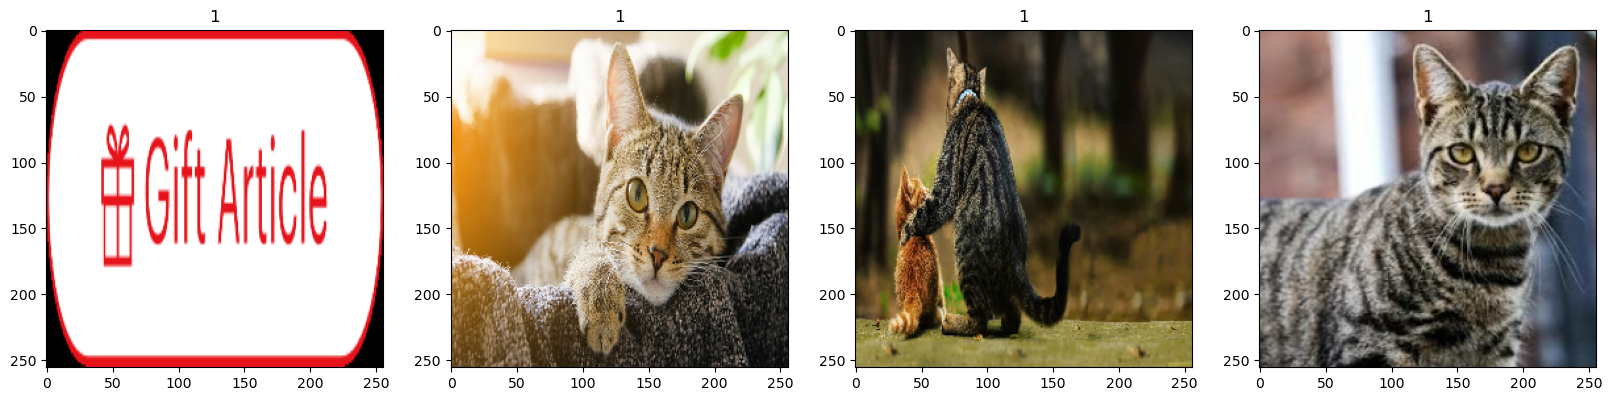

In [161]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
#class 0 - Dogs
#class 1 - Cats

# Splitting data

In [162]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [163]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building the model

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten,Dropout

In [165]:
model = Sequential()

model.add(Convolution2D(16, (3,3), 1, activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Convolution2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Convolution2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [166]:
model.compile('adam',loss=tf._losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [167]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [168]:
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - accuracy: 0.5073 - loss: 0.8082 - val_accuracy: 0.5000 - val_loss: 0.7268
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.6042 - loss: 0.6886 - val_accuracy: 0.5156 - val_loss: 0.6770
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.4990 - loss: 0.6930 - val_accuracy: 0.5781 - val_loss: 0.6682
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.5885 - loss: 0.6701 - val_accuracy: 0.7188 - val_loss: 0.6377
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 509ms/step - accuracy: 0.6469 - loss: 0.6304 - val_accuracy: 0.7500 - val_loss: 0.5760
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.6750 - loss: 0.5732 - val_accuracy: 0.6406 - val_loss: 0.5765
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.7490 - loss: 0.5010 - val_accuracy: 0.8281 - val_loss: 0.4206
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.8208 - loss: 0.4172 - val_accuracy: 0.7812 - val_loss:

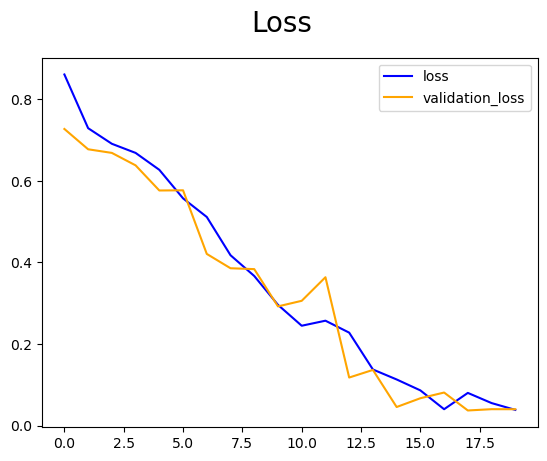

In [169]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label = 'validation_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

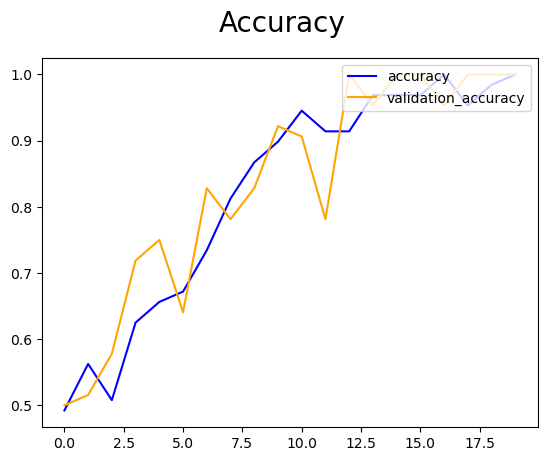

In [170]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label = 'validation_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper right')
plt.show()

# Testing the model

In [171]:
from tensorflow.keras.metrics import Precision,Recall
pre = Precision()
re = Recall()

In [172]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


2024-09-16 16:24:40.706961: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [173]:
print(f'Precision = {pre.result()}, Recall = {re.result()}')

Precision = 1.0, Recall = 1.0


# Testing with new images

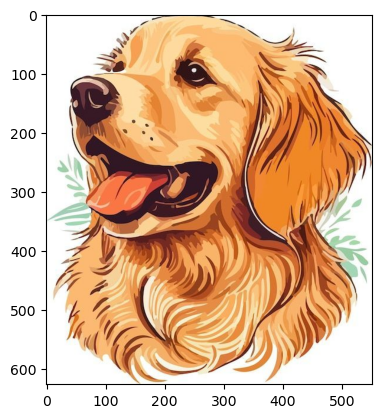

In [174]:
img = cv2.imread('dogtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

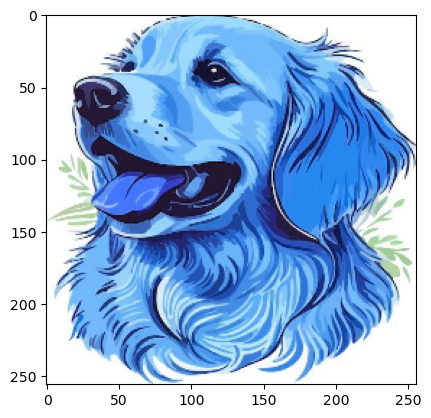

In [175]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [176]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [177]:
if yhat<0.5:
    print('Predicted class is a dog')
else:
    print('Predicted class is a cat')

Predicted class is a dog


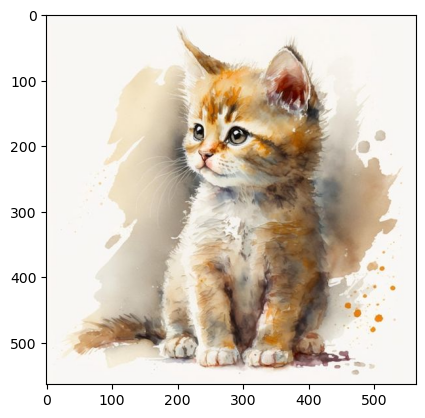

In [186]:
cat_img = cv2.imread('cattest.jpg')
plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB))
plt.show()

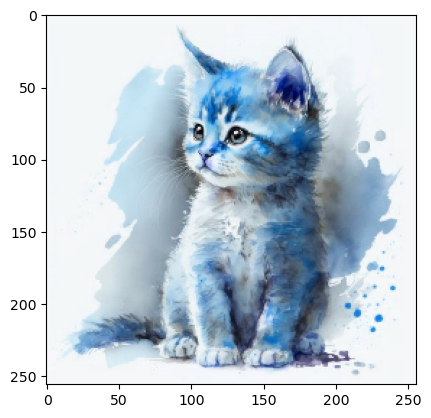

In [187]:
cat_resize = tf.image.resize(cat_img,(256,256))
plt.imshow(cat_resize.numpy().astype(int))
plt.show()

In [188]:
yhat = model.predict(np.expand_dims(cat_resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.8572497]], dtype=float32)

In [189]:
if yhat<0.5:
    print('Predicted class is a dog')
else:
    print('Predicted class is a cat')

Predicted class is a cat
